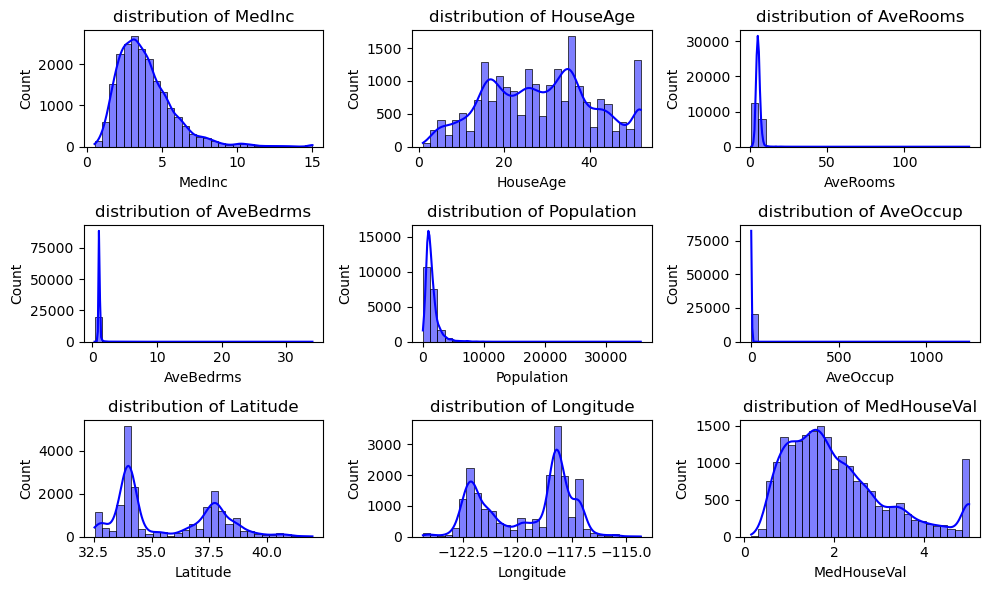

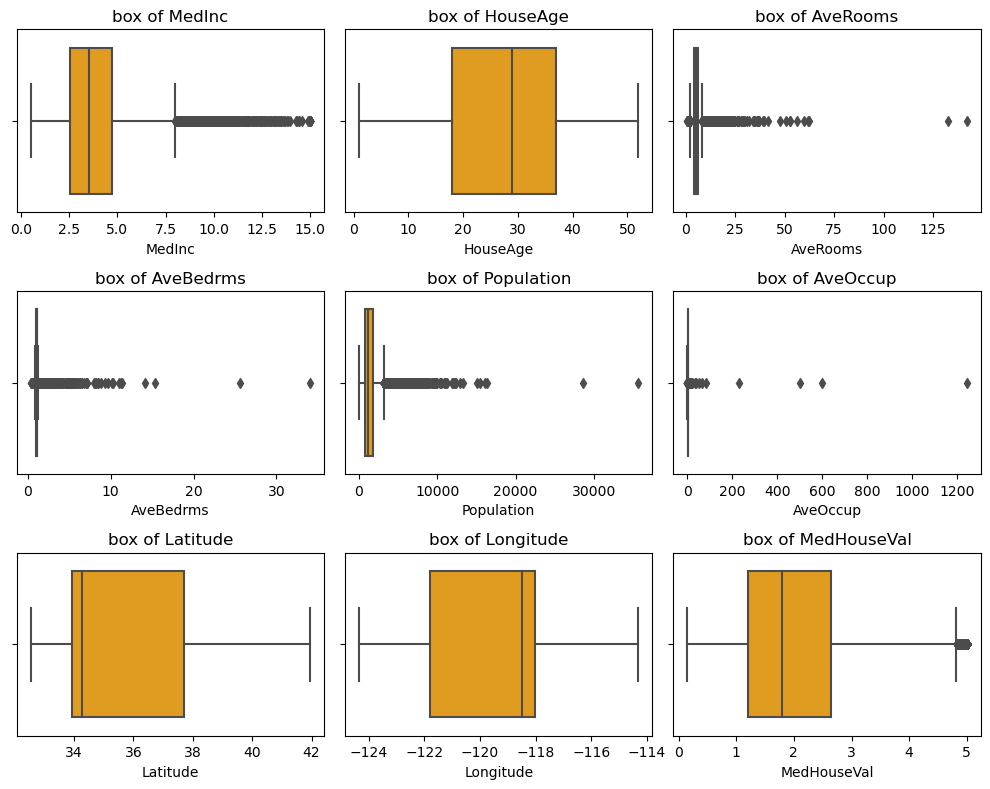

outliers detection
MedHouseVal : 20515 outliers


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 
from sklearn.datasets import fetch_california_housing


data = fetch_california_housing(as_frame=True)
housing_df = data.frame 

numerical_features = housing_df.select_dtypes(include = [np.number]).columns
plt.figure(figsize=(10,6))

for i,feature in enumerate(numerical_features):
    plt.subplot(3,3,i+1)
    sns.histplot(housing_df[feature],kde=True,bins=30,color='blue')
    plt.title(f'distribution of {feature}')

plt.tight_layout()
plt.show()

plt.figure(figsize=(10,8))

for i,feature in enumerate(numerical_features):
    plt.subplot(3,3,i+1)
    sns.boxplot(x=housing_df[feature],color='orange')
    plt.title(f'box of {feature}')

plt.tight_layout()
plt.show()

print('outliers detection')
outliers_summary = {}

for feautre in numerical_features:
    Q1 = housing_df[feature].quantile(0.25)
    Q3 = housing_df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lb = Q1-1.5*IQR
    ub = Q3-1.5*IQR 
    outliers = housing_df[(housing_df[feature] < lb) |(housing_df[feature] > ub)]

outliers_summary[feature] = len(outliers)
print(f'{feature} : {len(outliers)} outliers')